<a href="https://colab.research.google.com/github/DataEtnos/clusterizacao-cipal/blob/main/clusterizacao_ad_rep_cinpal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
# A tabela 'dataset' vem diretamente do Power BI
df = pd.read_excel('/content/RFV -  CIPOE.xlsx')

In [ ]:
# Selecionando as colunas de Recência, Frequência e ValorTotal
rfv_data = df[['Recencia', 'Frequencia', 'ValorTotal']]

# Normalizando os dados com MinMaxScaler
scaler = MinMaxScaler()
rfv_scaled = scaler.fit_transform(rfv_data)

# Inicializando o modelo KMeans++ com 6 clusters
model_kmeans = KMeans(n_clusters=6, init='k-means++', random_state=42)

# Treinando o modelo e fazendo a previsão dos clusters
labels_kmeans = model_kmeans.fit_predict(rfv_scaled)

# Adicionando a coluna 'KMeans_Cluster' no dataframe original
df['KMeans_Cluster'] = labels_kmeans


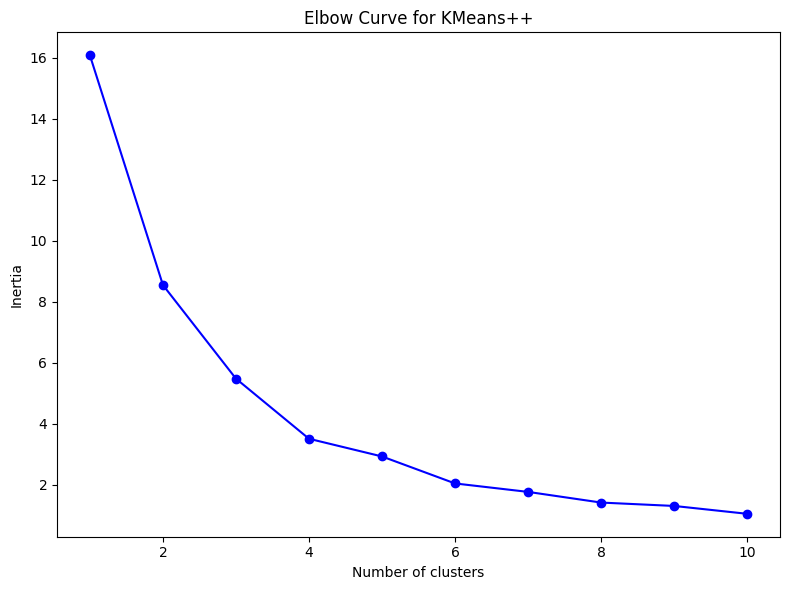

In [ ]:
# Função para plotar a curva de Elbow
def plot_elbow(X, model_name):
    inertia = []
    for i in range(1, 11):
        model = KMeans(n_clusters=i, init='k-means++', random_state=42)
        model.fit(X)
        inertia.append(model.inertia_)

    plt.figure(figsize=(8, 6))
    plt.plot(range(1, 11), inertia, marker='o', color='b')
    plt.title(f"Elbow Curve for {model_name}")
    plt.xlabel("Number of clusters")
    plt.ylabel("Inertia")
    plt.tight_layout()
    plt.show()

# Plotando a Curva de Elbow
plot_elbow(rfv_scaled, 'KMeans++')

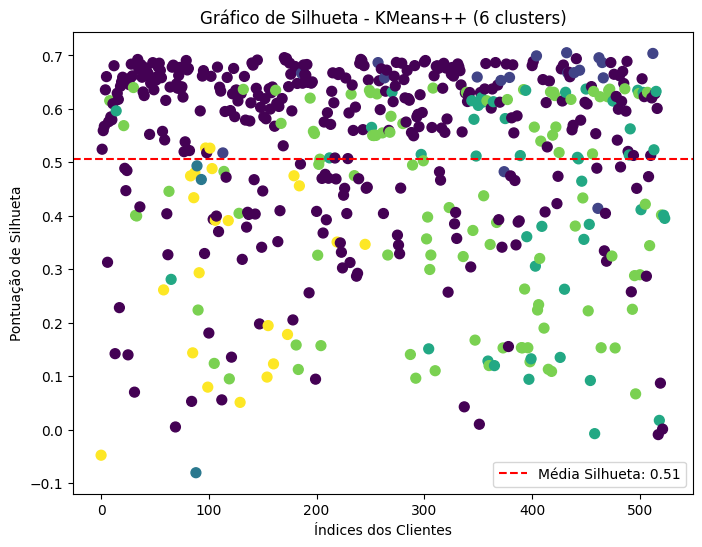

In [ ]:
# Calculando a pontuação de silhueta para cada ponto
silhouette_vals = silhouette_samples(rfv_scaled, df['KMeans_Cluster'])

# Pontuação média de silhueta para o modelo
silhouette_avg = silhouette_score(rfv_scaled, df['KMeans_Cluster'])

# Plotando o gráfico de silhueta
plt.figure(figsize=(8, 6))
plt.scatter(range(len(silhouette_vals)), silhouette_vals, c=df['KMeans_Cluster'], cmap='viridis', s=50)
plt.axhline(y=silhouette_avg, color='red', linestyle='--', label=f'Média Silhueta: {silhouette_avg:.2f}')
plt.title("Gráfico de Silhueta - KMeans++ (6 clusters)")
plt.xlabel("Índices dos Clientes")
plt.ylabel("Pontuação de Silhueta")
plt.legend()
plt.show()

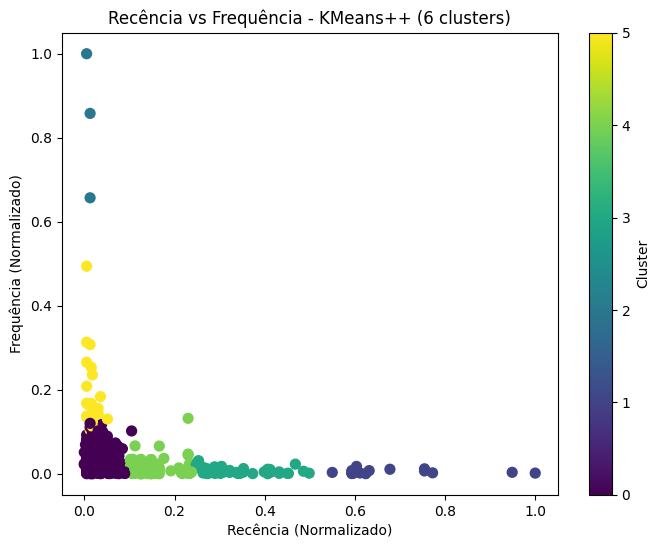

In [ ]:
# Plotando os clusters no gráfico de dispersão para Recência vs Frequência
plt.figure(figsize=(8, 6))
plt.scatter(rfv_scaled[:, 0], rfv_scaled[:, 1], c=df['KMeans_Cluster'], cmap='viridis', s=50)
plt.title("Recência vs Frequência - KMeans++ (6 clusters)")
plt.xlabel("Recência (Normalizado)")
plt.ylabel("Frequência (Normalizado)")
plt.colorbar(label='Cluster')
plt.show()

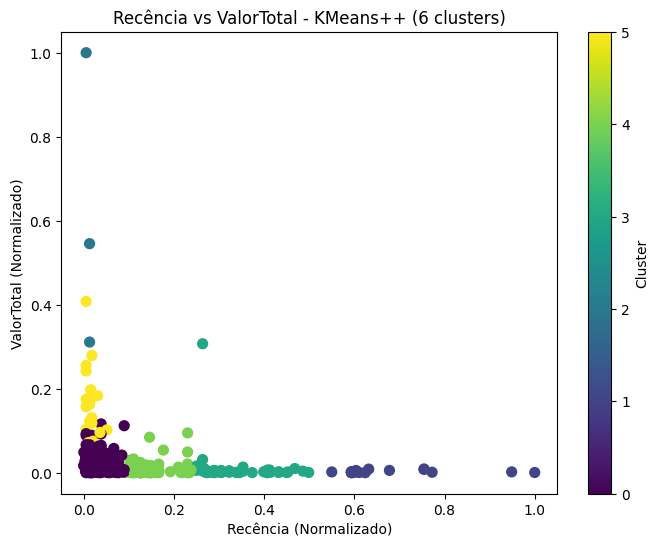

In [ ]:
# Plotando a relação entre Recência e ValorTotal
plt.figure(figsize=(8, 6))
plt.scatter(rfv_scaled[:, 0], rfv_scaled[:, 2], c=df['KMeans_Cluster'], cmap='viridis', s=50)
plt.title("Recência vs ValorTotal - KMeans++ (6 clusters)")
plt.xlabel("Recência (Normalizado)")
plt.ylabel("ValorTotal (Normalizado)")
plt.colorbar(label='Cluster')
plt.show()


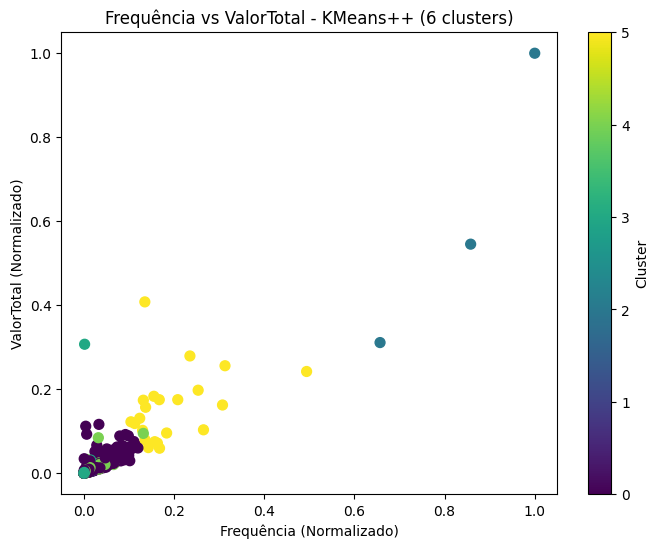

In [ ]:
# Plotando a relação entre Frequência e ValorTotal
plt.figure(figsize=(8, 6))
plt.scatter(rfv_scaled[:, 1], rfv_scaled[:, 2], c=df['KMeans_Cluster'], cmap='viridis', s=50)
plt.title("Frequência vs ValorTotal - KMeans++ (6 clusters)")
plt.xlabel("Frequência (Normalizado)")
plt.ylabel("ValorTotal (Normalizado)")
plt.colorbar(label='Cluster')
plt.show()


In [ ]:
# Gerando um resumo dos clusters
cluster_summary = df.groupby('KMeans_Cluster').agg({
    'Recencia': ['mean', 'std'],
    'Frequencia': ['mean', 'std'],
    'ValorTotal': ['mean', 'std']
}).reset_index()

# Exibindo o resumo dos clusters
print(cluster_summary)


  KMeans_Cluster    Recencia               Frequencia                \
                        mean        std          mean           std   
0              0   15.606607   9.422395   2203.879880   1991.588687   
1              1  262.944444  49.733965    388.833333    346.687900   
2              2    4.000000   1.732051  63045.666667  12963.119082   
3              3  129.456522  28.556149    595.695652    598.804842   
4              4   58.196078  17.454915    949.284314   1352.857499   
5              5    6.318182   4.663806  14450.909091   6825.159680   

     ValorTotal                
           mean           std  
0  3.034532e+06  3.249396e+06  
1  4.838230e+05  5.081238e+05  
2  1.042952e+08  5.903359e+07  
3  1.864113e+06  7.577518e+06  
4  1.375140e+06  2.526051e+06  
5  2.627251e+07  1.424188e+07  


In [ ]:
# Separando as colunas para as análises solicitadas
df['Recencia_vs_Frequencia'] = df.apply(lambda row: f"Cluster {row['KMeans_Cluster']} - Recência vs Frequência", axis=1)
df['Recencia_vs_ValorTotal'] = df.apply(lambda row: f"Cluster {row['KMeans_Cluster']} - Recência vs Valor Total", axis=1)
df['Frequencia_vs_ValorTotal'] = df.apply(lambda row: f"Cluster {row['KMeans_Cluster']} - Frequência vs Valor Total", axis=1)

# Exportando para Excel com as 3 colunas por análise
output_file = '/content/KMeans_Cluster_Analysis_separada.xlsx'
df[['Recencia_vs_Frequencia', 'Recencia_vs_ValorTotal', 'Frequencia_vs_ValorTotal']].to_excel(output_file, index=False)

print(f"Arquivo exportado para: {output_file}")


Arquivo exportado para: /content/KMeans_Cluster_Analysis_separada.xlsx


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# A tabela 'dataset' vem diretamente do Power BI
df = pd.read_excel('/content/RFV -  CIPOE.xlsx')

# Selecionando as colunas de Recência, Frequência e ValorTotal
rfv_data = df[['Recencia', 'Frequencia', 'ValorTotal']]

# Normalizando os dados com MinMaxScaler
scaler = MinMaxScaler()
rfv_scaled = scaler.fit_transform(rfv_data)

# Inicializando o modelo KMeans++ com 6 clusters
model_kmeans = KMeans(n_clusters=6, init='k-means++', random_state=42)

# Treinando o modelo e fazendo a previsão dos clusters
labels_kmeans = model_kmeans.fit_predict(rfv_scaled)

# Adicionando a coluna 'KMeans_Cluster' no dataframe original
df['KMeans_Cluster'] = labels_kmeans

# Criando 3 colunas com a relação de cada cluster para cada tipo de análise
df['Recencia_vs_Frequencia'] = df.apply(lambda row: f" {row['KMeans_Cluster']}", axis=1)
df['Recencia_vs_ValorTotal'] = df.apply(lambda row: f" {row['KMeans_Cluster']}", axis=1)
df['Frequencia_vs_ValorTotal'] = df.apply(lambda row: f"{row['KMeans_Cluster']}", axis=1)

# Exportando o DataFrame com as colunas de cluster para o Excel
output_file = '/content/KMeans_Cluster_Analysis_separada_no_dataframe.xlsx'
df.to_excel(output_file, index=False)

print(f"Arquivo exportado para: {output_file}")


Arquivo exportado para: /content/KMeans_Cluster_Analysis_separada_no_dataframe.xlsx
